In [30]:
import random as rd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

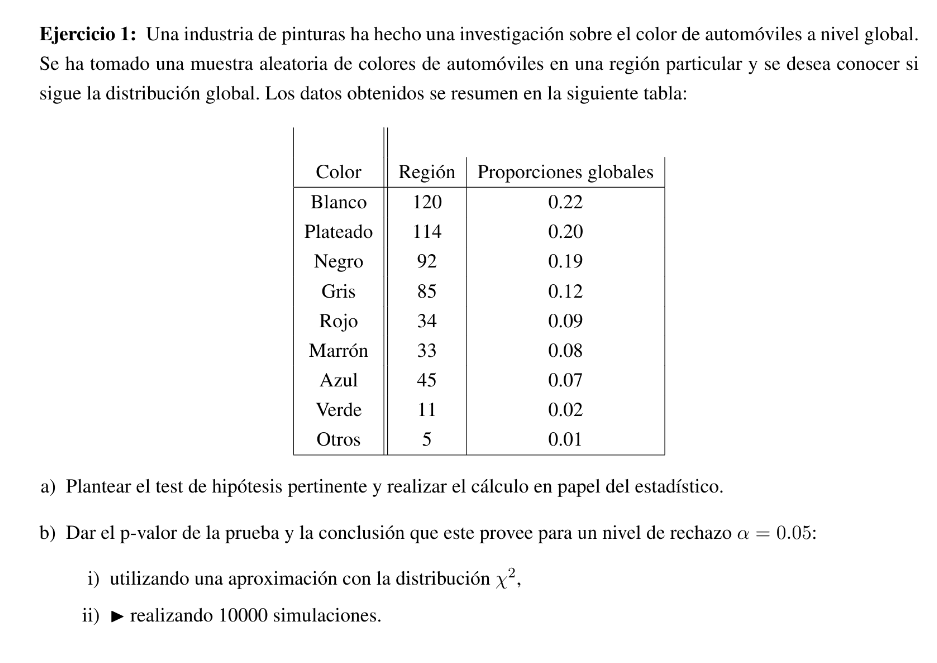

$H_0$: La muestra proviene de una distribución planteada como la distribución global de pinturas.

Como la distribucion a la que quiero comparar la conozco, entonces conozco los $p_i$ para cada grupo. En este caso:
$$
n = 539 \\
N_i = [120, 114, 92, 85, 34, 33, 45, 11, 5]\\
p_i = [0.22, 0.20, 0.19, 0.12, 0.09, 0.08, 0.07, 0.02, 0.01] 
$$

Luego el estadistico sera:
$$
\begin{aligned}
    T &= \sum_{i=1}^{9} \frac{(N_i - np_i)^2}{np_i} \\
    &= \frac{(120 - 539*0.22)^2}{539*0.22} + \frac{(114 - 539*0.20)^2}{539*0.20} + \frac{(92 - 539*0.19)^2}{539*0.19} + \frac{(85 - 539*0.12)^2}{539*0.12} + \\&\frac{(34 - 539*0.09)^2}{539*0.09} + \frac{(33 - 539*0.08)^2}{539*0.08} + \frac{(45 - 539*0.07)^2}{539*0.07} + \frac{(11 - 539*0.02)^2}{539*0.02} + \frac{(5 - 539*0.01)^2}{539*0.01} \\
    &= 15.9643
\end{aligned}
$$

In [31]:
Ni = [120, 114, 92, 85, 34, 33, 45, 11, 5]
n = sum(Ni)
pi = [0.22, 0.20, 0.19, 0.12, 0.09, 0.08, 0.07, 0.02, 0.01]

In [32]:
def estadistico(n, pi,Ni):
    t = 0
    for i in range(len(Ni)):
        t += ((Ni[i] - n*pi[i])**2)/(n*pi[i])
    return t

def calcular_pvalor_param(t, k, m):
    return 1 - sp.stats.chi2.cdf(t, k-1-m)

In [33]:
estadistico(n, pi, Ni)

15.964309985059911

Para estimar el p-valor utilizando una aproximacion con la distribucion $\chi^2$, en este caso usare 8 grados de libertad y tengo que encontrar:
$$
p-valor = P(\chi_{8}^2 > 15.9643) \sim 0.04453125
$$
utilizando la tabla y promediando entre los valores conocidos

In [34]:
calcular_pvalor_param(15.9643, len(Ni), 0)

0.04289394830335702

In [35]:
def generar_x():
    pi = [0.22, 0.20, 0.19, 0.12, 0.09, 0.08, 0.07, 0.02, 0.01]
    u = rd.random()
    x = 0
    F = pi[0]
    while u >= F:
        x += 1
        F += pi[x]
    return x

In [36]:
def simular_pvalor(nsims, n, pi, Ni):
    t = estadistico(n, pi, Ni)
    k = len(Ni)
    hits = 0
    for i in range(nsims):
        Ni_ = [0]*k
        for j in range(n):
            x = generar_x()
            Ni_[x] += 1
        t_sim = estadistico(n, pi, Ni_)
        if t_sim >= t:
            hits += 1
    return hits/nsims

In [95]:
simular_pvalor(10000, n, pi, Ni)

0.0493

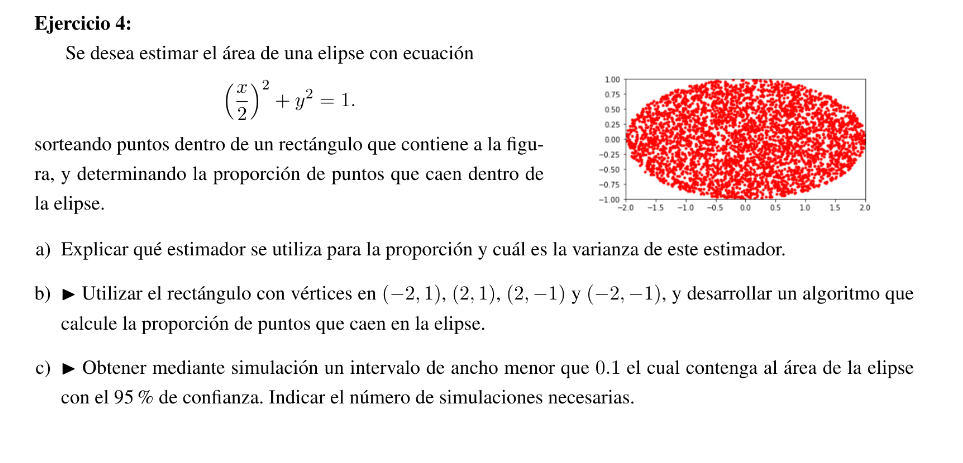

La proporcion de puntos que caen dentro del elipse podria verse como la Esperanza de una variable Bernoulli tal que vale 1 si cae dentro del elipse y 0 si no. Entonces como E[X] = p, entonces un estimador para la proporcion es la media muestral $\bar{X}$ y la varianza de la media muestral es 
$$
Var(\hat{p}) = Var(\bar{X}) = \frac{\hat{\sigma}^2}{n} = \frac{\bar{X}(1-\bar{X})}{n}
$$

In [38]:
def en_elipse(x,y):
    return (x/2)**2 + y**2 <= 1

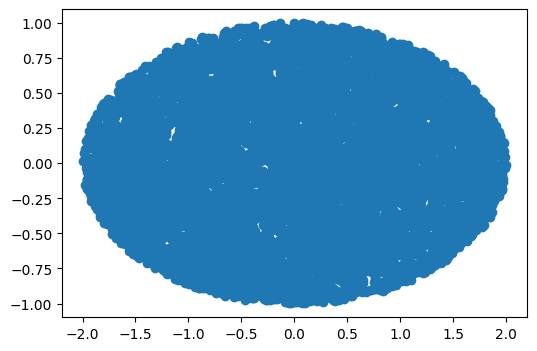

In [51]:
# create a graph of the point inside the elipse with equation (x/2)^2 + y^2 = 1
x = []
y = []
for i in range(10000):
    x_aux = rd.uniform(-2,2)
    y_aux = rd.uniform(-1,1)
    if en_elipse(x_aux, y_aux):
        x.append(x_aux)
        y.append(y_aux)
fig = plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.show()

In [52]:
def estimar_prop(nsims):
    hits = 0
    for i in range(nsims):
        x = rd.uniform(-2,2)
        y = rd.uniform(-1,1)
        hits += en_elipse(x,y)
    return hits/nsims

In [77]:
estimar_prop(10000)

0.7887

In [96]:
def intervalo_proporcion(z_alfa_2, L):
    'Confianza = 1 - alfa, ampliud del intervalo = L'
    d = L/(2*z_alfa_2)
    p = 0
    n = 0
    while n <= 100 or np.sqrt(p * (1-p)/n) > d:
        n += 1
        x_sim = rd.uniform(-2,2)
        y_sim = rd.uniform(-1,1)
        X = en_elipse(x_sim, y_sim)
        p = p + (X - p)/n
    s2 = p*(1-p)
    izq = p - z_alfa_2*np.sqrt(s2/n)
    der = p + z_alfa_2*np.sqrt(s2/n)
    intervalo = (round(izq,4), round(der,4))
    return p, s2, n, intervalo

In [93]:
intervalo_proporcion(1.96, 0.1)

(0.7890625000000002, 0.16644287109374986, 256, (0.7391, 0.839))